# The Obesity Epidemic and City Composition
_Capstone Project_

## To Do
* Update to get all zipcodes

#### Import Required Libraries

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from bs4 import BeautifulSoup
from  geopy.geocoders import Nominatim

In [48]:
# import Foursquare developer credentials
%run "credentials.py"

#### Request obesity data and parse response

In [2]:
url_obesity_data = "https://www.stateofobesity.org/wp-json/state-of-obesity/v1/adult-obesity-data"
response = requests.get(url_obesity_data).json()

In [3]:
response_df = pd.DataFrame.from_dict(response)
response_df.head()
#obesity_data_df.to_csv("assets/national_obesity_data.csv")

,ab,fips,st,yr1990,yr1990cnf,yr1990rnk,yr1995,yr1995cnf,yr1995rnk,yr2000,...,yr2014rnk,yr2015,yr2015cnf,yr2015rnk,yr2016,yr2016cnf,yr2016rnk,yr2017,yr2017cnf,yr2017rnk
0,AL,01,Alabama,11.2,1.0,21.0,15.7,1.1,17,22.6,...,5,35.6,1.5,2,35.7,1.6,3,36.3,1.6,5
1,AK,02,Alaska,NaN,NaN,NaN,15.7,1.5,17,20.9,...,24,29.8,2.4,26,31.4,2.9,20,34.2,2.9,9
2,AZ,04,Arizona,10.6,1.2,29.0,12.6,1.3,44,14.9,...,29,28.4,1.6,34,29.0,1.5,29,29.5,1.0,30
3,AR,05,Arkansas,NaN,NaN,NaN,17.0,1.2,5,21.9,...,1,34.5,2.3,6,35.7,2.4,3,35.0,2.4,7
4,CA,06,California,9.9,0.9,37.0,13.9,0.9,32,18.7,...,47,24.2,1.0,47,25.0,1.1,47,25.1,1.3,48


In [4]:
state_abbrevs = response_df[["ab", "st"]]

In [5]:
response_df.columns

Index(['ab', 'fips', 'st', 'yr1990', 'yr1990cnf', 'yr1990rnk', 'yr1995',
       'yr1995cnf', 'yr1995rnk', 'yr2000', 'yr2000cnf', 'yr2000rnk', 'yr2003',
       'yr2003cnf', 'yr2003rnk', 'yr2004', 'yr2004cnf', 'yr2004rnk', 'yr2005',
       'yr2005cnf', 'yr2005rnk', 'yr2006', 'yr2006cnf', 'yr2006rnk', 'yr2007',
       'yr2007cnf', 'yr2007rnk', 'yr2008', 'yr2008cnf', 'yr2008rnk', 'yr2009',
       'yr2009cnf', 'yr2009rnk', 'yr2010', 'yr2010cnf', 'yr2010rnk', 'yr2011',
       'yr2011cnf', 'yr2011rnk', 'yr2012', 'yr2012cnf', 'yr2012rnk', 'yr2013',
       'yr2013cnf', 'yr2013rnk', 'yr2014', 'yr2014cnf', 'yr2014rnk', 'yr2015',
       'yr2015cnf', 'yr2015rnk', 'yr2016', 'yr2016cnf', 'yr2016rnk', 'yr2017',
       'yr2017cnf', 'yr2017rnk'],
      dtype='object')

In [6]:
cols = ["st"]
for i in range(0, 18):
    if i not in [1, 2]:
        if i < 10:
            cols.append("yr200" + str(i))
        else:
            cols.append("yr20" + str(i))

obesity_rates_df = response_df[cols]
obesity_rates_df = obesity_rates_df.set_index("st")
obesity_rates_df.index.name = "State"
obesity_rates_df.columns = [col[-4:] for col in obesity_rates_df.columns]
obesity_rates_df.head()

,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,,,,,,,
Alabama,22.6,28.4,27.7,28.7,29.4,30.1,31.2,31.6,32.3,32.0,33.0,32.4,33.5,35.6,35.7,36.3
Alaska,20.9,23.5,23.5,24.9,25.8,27.3,27.2,26.9,25.9,27.4,25.7,28.4,29.7,29.8,31.4,34.2
Arizona,14.9,20.1,20.3,20.8,21.7,23.3,24.8,25.8,25.4,24.7,26.0,26.8,28.9,28.4,29.0,29.5
Arkansas,21.9,25.2,25.0,26.4,27.0,28.1,28.6,30.1,30.6,30.9,34.5,34.6,35.9,34.5,35.7,35.0
California,18.7,23.2,21.5,22.7,22.7,23.1,23.6,24.4,24.8,23.8,25.0,24.1,24.7,24.2,25.0,25.1


In [7]:
obesity_rates_df.describe()

,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,51.000000,51.000000,50.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,19.103922,22.415686,22.528000,23.337255,24.225490,25.270588,25.984314,26.723529,27.178431,27.584314,27.945098,28.650980,29.225490,29.282353,29.792157,30.600000
std,2.390645,2.837349,2.604003,2.780285,2.804485,2.882450,2.904092,3.100619,3.214736,3.049483,3.375874,3.435076,3.416773,3.870850,3.738975,3.852012
min,14.500000,16.000000,16.400000,16.900000,17.600000,18.400000,18.900000,19.100000,19.800000,20.700000,20.500000,21.300000,21.300000,20.200000,22.300000,22.600000
25%,17.050000,20.200000,20.750000,21.600000,22.400000,23.300000,24.200000,25.050000,25.150000,25.200000,25.650000,26.350000,27.150000,26.200000,27.250000,27.900000
50%,19.400000,22.900000,22.600000,23.200000,24.400000,25.300000,26.000000,26.600000,27.100000,27.800000,27.600000,29.400000,29.600000,29.800000,29.900000,31.300000
75%,20.900000,24.450000,24.325000,25.300000,26.200000,27.350000,28.000000,29.000000,29.500000,29.600000,30.000000,31.050000,31.250000,31.550000,32.000000,33.100000
max,23.900000,28.400000,28.100000,29.500000,30.600000,31.700000,32.500000,33.800000,34.400000,34.900000,34.700000,35.100000,35.900000,36.200000,37.700000,38.100000


#### Examine obesity rate data on a national level

In [8]:
obesity_rates_df = obesity_rates_df.T
obesity_rates_df.index.name = "Year"
obesity_rates_df.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2000,22.6,20.9,14.9,21.9,18.7,14.5,16.0,17.1,20.1,18.4,...,18.4,20.9,21.7,17.3,17.0,18.7,18.4,23.9,19.4,16.6
2003,28.4,23.5,20.1,25.2,23.2,16.0,19.1,24.0,20.3,19.9,...,22.9,25.0,24.6,20.8,19.6,21.7,21.7,27.7,20.9,20.1
2004,27.7,23.5,20.3,25.0,21.5,16.4,18.9,22.5,21.2,20.7,...,22.6,25.6,25.3,19.6,19.1,22.9,21.7,27.6,21.9,20.1
2005,28.7,24.9,20.8,26.4,22.7,16.9,19.6,22.8,21.5,21.8,...,24.0,26.6,25.8,20.8,19.5,23.3,22.4,28.6,22.9,21.7
2006,29.4,25.8,21.7,27.0,22.7,17.6,20.1,23.6,22.2,22.9,...,24.9,27.8,26.3,21.1,20.0,24.5,23.2,29.8,24.8,22.8


In [9]:
obesity_rates_df["National"] = obesity_rates_df.mean(axis=1)
obesity_rates_df = obesity_rates_df.reset_index()
obesity_rates_df.head()

State,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,National
0,2000,22.6,20.9,14.9,21.9,18.7,14.5,16.0,17.1,20.1,...,20.9,21.7,17.3,17.0,18.7,18.4,23.9,19.4,16.6,19.103922
1,2003,28.4,23.5,20.1,25.2,23.2,16.0,19.1,24.0,20.3,...,25.0,24.6,20.8,19.6,21.7,21.7,27.7,20.9,20.1,22.415686
2,2004,27.7,23.5,20.3,25.0,21.5,16.4,18.9,22.5,21.2,...,25.6,25.3,19.6,19.1,22.9,21.7,27.6,21.9,20.1,22.528000
3,2005,28.7,24.9,20.8,26.4,22.7,16.9,19.6,22.8,21.5,...,26.6,25.8,20.8,19.5,23.3,22.4,28.6,22.9,21.7,23.337255
4,2006,29.4,25.8,21.7,27.0,22.7,17.6,20.1,23.6,22.2,...,27.8,26.3,21.1,20.0,24.5,23.2,29.8,24.8,22.8,24.225490


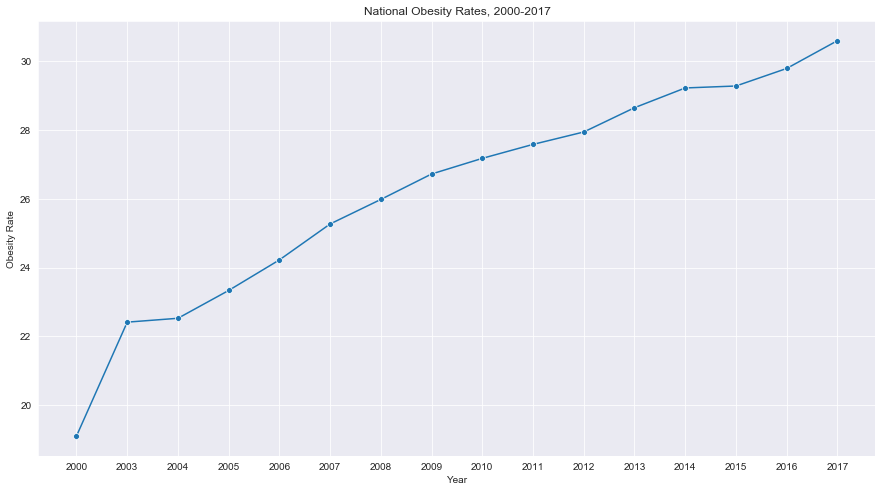

In [10]:
palette = sns.color_palette("mako_r", 6)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,8))

sns.lineplot("Year", "National", data=obesity_rates_df, marker='o')
plt.title("National Obesity Rates, 2000-2017")
plt.xlabel("Year")
plt.ylabel("Obesity Rate")
plt.show()

#### Examine obesity rate trends by state

In [11]:
map_df = obesity_rates_df.set_index("Year").T
map_df = map_df.reset_index()
map_df.columns.name = None
map_df.head()

,State,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,22.6,28.4,27.7,28.7,29.4,30.1,31.2,31.6,32.3,32.0,33.0,32.4,33.5,35.6,35.7,36.3
1,Alaska,20.9,23.5,23.5,24.9,25.8,27.3,27.2,26.9,25.9,27.4,25.7,28.4,29.7,29.8,31.4,34.2
2,Arizona,14.9,20.1,20.3,20.8,21.7,23.3,24.8,25.8,25.4,24.7,26.0,26.8,28.9,28.4,29.0,29.5
3,Arkansas,21.9,25.2,25.0,26.4,27.0,28.1,28.6,30.1,30.6,30.9,34.5,34.6,35.9,34.5,35.7,35.0
4,California,18.7,23.2,21.5,22.7,22.7,23.1,23.6,24.4,24.8,23.8,25.0,24.1,24.7,24.2,25.0,25.1


In [12]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
states_geo = f'{url}/us-states.json'

states_map = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=states_geo,
    name='choropleth',
    data=map_df,
    columns=['State', '2017'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Obesity Rate (%)'
).add_to(states_map)

folium.LayerControl().add_to(states_map)

states_map

In [13]:
tidy_df = obesity_rates_df.iloc[:, :-1].melt(id_vars="Year")
tidy_df = tidy_df.rename(columns={"value": "Obesity_Rate"})
tidy_df.head()

,Year,State,Obesity_Rate
0,2000,Alabama,22.6
1,2003,Alabama,28.4
2,2004,Alabama,27.7
3,2005,Alabama,28.7
4,2006,Alabama,29.4


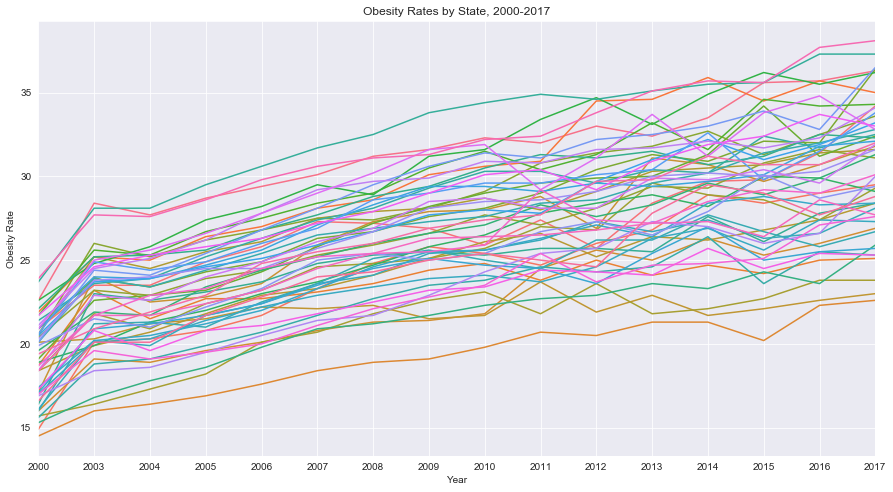

In [14]:
palette = sns.color_palette("mako_r", 6)
fig = plt.figure(figsize=(15,8))

sns.lineplot(x="Year", y="Obesity_Rate", hue="State", data=tidy_df, legend=False)
plt.title("Obesity Rates by State, 2000-2017")
plt.xlim("2000", "2017")
plt.xlabel("Year")
plt.ylabel("Obesity Rate")
plt.show()

#### Rank states based on 2017 obesity rate

In [15]:
map_df.head()

,State,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,22.6,28.4,27.7,28.7,29.4,30.1,31.2,31.6,32.3,32.0,33.0,32.4,33.5,35.6,35.7,36.3
1,Alaska,20.9,23.5,23.5,24.9,25.8,27.3,27.2,26.9,25.9,27.4,25.7,28.4,29.7,29.8,31.4,34.2
2,Arizona,14.9,20.1,20.3,20.8,21.7,23.3,24.8,25.8,25.4,24.7,26.0,26.8,28.9,28.4,29.0,29.5
3,Arkansas,21.9,25.2,25.0,26.4,27.0,28.1,28.6,30.1,30.6,30.9,34.5,34.6,35.9,34.5,35.7,35.0
4,California,18.7,23.2,21.5,22.7,22.7,23.1,23.6,24.4,24.8,23.8,25.0,24.1,24.7,24.2,25.0,25.1


In [16]:
obesity_rates_2017 = map_df[["State", "2017"]].sort_values(by="2017", ascending=False).reset_index()
obesity_rates_2017["State Rank"] = obesity_rates_2017.index.values + 1
obesity_rates_2017 = obesity_rates_2017.drop(columns="index")
obesity_rates_2017 = obesity_rates_2017.rename(columns={"2017": "2017 Obesity Rate"})
obesity_rates_2017.head()

,State,2017 Obesity Rate,State Rank
0,West Virginia,38.1,1
1,Mississippi,37.3,2
2,Oklahoma,36.5,3
3,Iowa,36.4,4
4,Alabama,36.3,5


#### Scrape Wikipedia for capital cities for each state

In [17]:
url = "https://simple.wikipedia.org/wiki/List_of_U.S._state_capitals"

page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

table = soup.find(class_="wikitable")

data = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if cells:
        data.append([cells[0].text.strip(),cells[3].text.strip()])

location_data_df = pd.DataFrame(data)
location_data_df.head()

,0,1
0,Alabama,Montgomery
1,Alaska,Juneau
2,Arizona,Phoenix
3,Arkansas,Little Rock
4,California,Sacramento


#### Construct dataframe with states, capital cities, and abbreviations

In [18]:
location_data_df = location_data_df.merge(state_abbrevs, how="inner", left_on=0, right_on="st")
location_data_df = location_data_df.drop("st", axis=1)
location_data_df.columns = ["State", "Capital City", "Abbreviation"]
location_data_df.head()

,State,Capital City,Abbreviation
0,Alabama,Montgomery,AL
1,Alaska,Juneau,AK
2,Arizona,Phoenix,AZ
3,Arkansas,Little Rock,AR
4,California,Sacramento,CA


#### Combine location data with 2017 obesity data
_Excludes District of Columbia_

In [19]:
obesity_rates_2017 = obesity_rates_2017.merge(location_data_df, how="inner", on="State")
obesity_rates_2017.head()

,State,2017 Obesity Rate,State Rank,Capital City,Abbreviation
0,West Virginia,38.1,1,Charleston,WV
1,Mississippi,37.3,2,Jackson,MS
2,Oklahoma,36.5,3,Oklahoma City,OK
3,Iowa,36.4,4,Des Moines,IA
4,Alabama,36.3,5,Montgomery,AL


#### What are the most obese states?

In [20]:
obesity_rates_2017.iloc[0:3, :]

,State,2017 Obesity Rate,State Rank,Capital City,Abbreviation
0,West Virginia,38.1,1,Charleston,WV
1,Mississippi,37.3,2,Jackson,MS
2,Oklahoma,36.5,3,Oklahoma City,OK


#### What are the least obese states?

In [21]:
obesity_rates_2017.iloc[-3:, :]

,State,2017 Obesity Rate,State Rank,Capital City,Abbreviation
47,California,25.1,49,Sacramento,CA
48,Hawaii,23.8,50,Honolulu,HI
49,Colorado,22.6,52,Denver,CO


#### Get lat/lngs for each capital city

In [23]:
def geocode_cities(row):
    geolocator = Nominatim(user_agent="project")
    capital_city = row["Capital City"]
    abbrev = row["Abbreviation"]
    country ="US"
    loc = geolocator.geocode(capital_city +',' + abbrev + ',' + country)
    return [loc.latitude, loc.longitude]

In [24]:
obesity_rates_2017.loc[:, "City Lat"], obesity_rates_2017.loc[:, "City Lng"] = zip(*obesity_rates_2017.apply(geocode_cities, axis=1).copy())
obesity_rates_2017.head()

,State,2017 Obesity Rate,State Rank,Capital City,Abbreviation,City Lat,City Lng
0,West Virginia,38.1,1,Charleston,WV,38.350600,-81.633281
1,Mississippi,37.3,2,Jackson,MS,32.299038,-90.184769
2,Oklahoma,36.5,3,Oklahoma City,OK,35.472989,-97.517054
3,Iowa,36.4,4,Des Moines,IA,41.591064,-93.603715
4,Alabama,36.3,5,Montgomery,AL,32.366966,-86.300648


In [ ]:
obesity_rates_2017.to_csv("assets/backup.csv")

#### Scrape Zip-Codes.com for zipcode data for each capital city

In [25]:
base_url = "https://www.zip-codes.com/city/"

In [26]:
def get_zipcodes():
    for idx, row in obesity_rates_2017.iterrows():
        url = base_url + row["Abbreviation"] + "-" + row["Capital City"] + ".asp"
      
        if idx == 0:
            page = requests.get(url)
            soup = BeautifulSoup(page.content)
            table = soup.find(class_="statTable")
            data = []
            row_index = 0
            for rows in table.find_all("tr"):
                if row_index != 0:
                    cells = rows.find_all("td")
                    data.append([row["State"], row["Abbreviation"], row["Capital City"], cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()])
                row_index += 1
    cols = ["State", "Abbreviation", "Capital City", "Zipcode", "Zipcode Type", "County", "Population"]
    zipcode_df = pd.DataFrame(data, columns=cols)
    return zipcode_df

In [27]:
zipcode_df = get_zipcodes()
zipcode_df.head()

,State,Abbreviation,Capital City,Zipcode,Zipcode Type,County,Population
0,West Virginia,WV,Charleston,ZIP Code 25301,Standard,Kanawha,"2,771"
1,West Virginia,WV,Charleston,ZIP Code 25302,Standard,Kanawha,"15,078"
2,West Virginia,WV,Charleston,ZIP Code 25303,Standard,Kanawha,"7,112"
3,West Virginia,WV,Charleston,ZIP Code 25304,Standard,Kanawha,"8,773"
4,West Virginia,WV,Charleston,ZIP Code 25305,Standard,Kanawha,0


In [28]:
zipcode_df["Zipcode"] = zipcode_df["Zipcode"].str.split(" ").str[2]
zipcode_df.head()

,State,Abbreviation,Capital City,Zipcode,Zipcode Type,County,Population
0,West Virginia,WV,Charleston,25301,Standard,Kanawha,"2,771"
1,West Virginia,WV,Charleston,25302,Standard,Kanawha,"15,078"
2,West Virginia,WV,Charleston,25303,Standard,Kanawha,"7,112"
3,West Virginia,WV,Charleston,25304,Standard,Kanawha,"8,773"
4,West Virginia,WV,Charleston,25305,Standard,Kanawha,0


#### Geocode zipcodes to get lat/lngs

In [29]:
def geocode_zipcodes(row):
    geolocator = Nominatim(user_agent="project")
    abbrev = row["Abbreviation"]
    country ="US"
    zipcode = row["Zipcode"]
    loc = geolocator.geocode(zipcode +',' + abbrev + ',' + country)
    return [loc.latitude, loc.longitude]

In [30]:
zipcode_df.loc[:, "Zipcode Lat"], zipcode_df.loc[:, "Zipcode Lng"] = zip(*zipcode_df.apply(geocode_zipcodes, axis=1).copy())
zipcode_df.head()

,State,Abbreviation,Capital City,Zipcode,Zipcode Type,County,Population,Zipcode Lat,Zipcode Lng
0,West Virginia,WV,Charleston,25301,Standard,Kanawha,"2,771",38.355821,-81.631532
1,West Virginia,WV,Charleston,25302,Standard,Kanawha,"15,078",38.405706,-81.543179
2,West Virginia,WV,Charleston,25303,Standard,Kanawha,"7,112",38.360054,-81.686615
3,West Virginia,WV,Charleston,25304,Standard,Kanawha,"8,773",38.317299,-81.590181
4,West Virginia,WV,Charleston,25305,Standard,Kanawha,0,38.337805,-81.610178


#### Visualize zipcodes for one of the capital cities

In [42]:
def plot_locations(city_lat, city_lng, city_name, df):
    city_map = folium.Map(location=[city_lat, city_lng], zoom_start=11)

    folium.vector_layers.CircleMarker(
        [city_lat, city_lng],
        radius=5,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
        tooltip=city_name
    ).add_to(city_map)

    for lat, lng, label in zip(df["Zipcode Lat"], df["Zipcode Lng"], df["Zipcode"]):
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=3,
            color="blue",
            fill=True,
            fill_color="red",
            fill_opacity=0.6,
            tooltip=label
        ).add_to(city_map)
        
    return city_map

In [43]:
obesity_rates_2017.head()

,State,2017 Obesity Rate,State Rank,Capital City,Abbreviation,City Lat,City Lng
0,West Virginia,38.1,1,Charleston,WV,38.350600,-81.633281
1,Mississippi,37.3,2,Jackson,MS,32.299038,-90.184769
2,Oklahoma,36.5,3,Oklahoma City,OK,35.472989,-97.517054
3,Iowa,36.4,4,Des Moines,IA,41.591064,-93.603715
4,Alabama,36.3,5,Montgomery,AL,32.366966,-86.300648


In [45]:
zipcode_df.head()

,State,Abbreviation,Capital City,Zipcode,Zipcode Type,County,Population,Zipcode Lat,Zipcode Lng
0,West Virginia,WV,Charleston,25301,Standard,Kanawha,"2,771",38.355821,-81.631532
1,West Virginia,WV,Charleston,25302,Standard,Kanawha,"15,078",38.405706,-81.543179
2,West Virginia,WV,Charleston,25303,Standard,Kanawha,"7,112",38.360054,-81.686615
3,West Virginia,WV,Charleston,25304,Standard,Kanawha,"8,773",38.317299,-81.590181
4,West Virginia,WV,Charleston,25305,Standard,Kanawha,0,38.337805,-81.610178


In [47]:
example_city = obesity_rates_2017.iloc[0,:]
plot_locations(example_city["City Lat"], 
               example_city["City Lng"], 
               example_city["Capital City"], 
               zipcode_df[zipcode_df["State"] == example_city["State"]])

#### Utilize the Foursquare API to get nearby venues within each zipcode

In [49]:
radius = 500
limit = 100

def get_nearby_venues(df):
    venues_list = []
    
    for lat, lng, label in zip(df["Zipcode Lat"], df["Zipcode Lng"], df["Zipcode"]): 
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            lat, lng, 
            radius, limit)
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        venues_list.append([(
            label,
            lat,
            lng,
            venue["venue"]["name"],
            venue["venue"]["location"]["lat"],
            venue["venue"]["location"]["lng"],
            venue["venue"]["categories"][0]["name"]
        ) for venue in results])
    
    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ["Zipcode", "Zipcode Lat", "Zipcode Lng", 
                             "Venue Name", "Venue Lat", "Venue Lng", "Venue Category"]
    
    return nearby_venues

In [51]:
nearby_venues = get_nearby_venues(zipcode_df)

#### Examine venue results

In [59]:
print("Retrieved {} nearby venues having {} unique categories.\n".format(nearby_venues.shape[0], 
                                                                       len(nearby_venues["Venue Category"].unique())))
nearby_venues.head()

Retrieved 537 nearby venues having 83 unique categories.



,Zipcode,Zipcode Lat,Zipcode Lng,Venue Name,Venue Lat,Venue Lng,Venue Category
0,25301,38.355821,-81.631532,Fazio's,38.356806,-81.628643,Italian Restaurant
1,25301,38.355821,-81.631532,Purple Onion,38.352481,-81.628070,Farmers Market
2,25301,38.355821,-81.631532,Bear's Den,38.351717,-81.631999,American Restaurant
3,25301,38.355821,-81.631532,Charleston Bread,38.352530,-81.629540,Bakery
4,25301,38.355821,-81.631532,The Wine & Cheese Shop,38.352367,-81.627942,Gourmet Shop


#### How many venues were found in each zipcode?

In [77]:
num_venues = nearby_venues.groupby("Zipcode").count()["Venue Category"].to_frame().sort_values("Venue Category", ascending=False)
num_venues.index.name = "Zipcode"
num_venues.columns = ["Number of Venues"]
num_venues.head()

,Number of Venues
Zipcode,
25339,88
25326,77
25389,62
25301,14
25357,10


#### What are the most common venue categories overall?

In [61]:
nearby_venues["Venue Category"].value_counts()[0:10]

American Restaurant    38
Pizza Place            35
Indian Restaurant      29
BBQ Joint              28
Restaurant             27
Asian Restaurant       27
Event Space            27
Liquor Store           27
Motorcycle Shop        27
Rental Car Location    27
Name: Venue Category, dtype: int64

#### What are the least common venue categories overall?

In [62]:
nearby_venues["Venue Category"].value_counts()[-10:]

Japanese Restaurant      1
Pub                      1
Water Park               1
Gas Station              1
Wings Joint              1
Performing Arts Venue    1
Other Great Outdoors     1
Cuban Restaurant         1
Rest Area                1
Rock Climbing Spot       1
Name: Venue Category, dtype: int64

#### One-hot encode venue category column

In [78]:
nearby_venues_onehot = pd.get_dummies(nearby_venues["Venue Category"])
nearby_venues_onehot["Zipcode"] = nearby_venues["Zipcode"]

# Re-order columns
cols = [nearby_venues_onehot.columns[-1]] + list(nearby_venues_onehot.columns.values[:-1])
nearby_venues_onehot = nearby_venues_onehot[cols]

nearby_venues_onehot.head()

,Zipcode,Accessories Store,American Restaurant,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Bookstore,...,Steakhouse,Supplement Shop,Sushi Restaurant,Tex-Mex Restaurant,Tourist Information Center,Toy / Game Store,Video Game Store,Water Park,Wings Joint,Women's Store
0,25301,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25301,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25301,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25301,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25301,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
nearby_venues_onehot.shape

(537, 84)

#### Group by zipcode to get frequency of venue categories

In [85]:
nearby_venues_grouped = nearby_venues_onehot.groupby("Zipcode").mean().reset_index()
nearby_venues_grouped.head()

,Zipcode,Accessories Store,American Restaurant,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Bookstore,...,Steakhouse,Supplement Shop,Sushi Restaurant,Tex-Mex Restaurant,Tourist Information Center,Toy / Game Store,Video Game Store,Water Park,Wings Joint,Women's Store
0,25301,0.0,0.071429,0.0,0.0,0.00,0.071429,0.000000,0.0,0.0,...,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0
1,25302,0.0,0.000000,0.0,0.0,0.25,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0
2,25303,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.00,0.0
3,25305,0.0,0.000000,0.0,0.0,0.00,0.000000,0.166667,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0
4,25313,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.25,0.0


#### Create helper function to list most frequent venue categories for each zipcode

In [114]:
def get_top_categories(df, idx, num=5):
    top = df.iloc[idx, 1:].T.reset_index()
    top.columns = ["Venue Category", "Frequency"]
    top["Frequency"] = top["Frequency"].astype(float)
    top = top.sort_values("Frequency", ascending=False).head(num)
    return top

In [118]:
top_num = 20
example_row = 2

example_zip = nearby_venues_grouped.iloc[example_row,0]
print("Top {} categories for zipcode {}:\n".format(top_num, example_zip))
get_top_categories(nearby_venues_grouped, example_row, top_num)

Top 20 categories for zipcode 25303:



,Venue Category,Frequency
80,Water Park,0.333333
37,Home Service,0.333333
36,History Museum,0.333333
0,Accessories Store,0.000000
52,Motorcycle Shop,0.000000
59,Pizza Place,0.000000
58,Pharmacy,0.000000
57,Performing Arts Venue,0.000000
56,Park,0.000000
55,Other Great Outdoors,0.000000


#### Future Improvements

* Standardization of area sizes, rather than reliance on zipcodes, which vary signficantly in size -- does this matter? Since we are using 500m radius?